# Data Analysis Notebok

This notebook is used to analyze the data generated during our numerical expeirments and to make plots.

In [1]:
## imports 
import tqdm
import os
import pickle
import numpy as np
import torch
import clifford as cl

In [2]:
## plotting imports and settings
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from cycler import cycler

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 5.0
plt.rcParams["xtick.minor.size"] = 3.0
plt.rcParams["ytick.major.size"] = 5.0
plt.rcParams["ytick.minor.size"] = 3.0
plt.rc("font", family="serif", size=14)
# matplotlib.rc('text', usetex=True)
matplotlib.rc("legend", fontsize=14)
plt.rcParams["ytick.minor.size"] = 3.0
matplotlib.rcParams.update(
    {"axes.grid": True, "grid.alpha": 0.75, "grid.linewidth": 0.5}
)
matplotlib.rcParams["axes.prop_cycle"] = cycler(
    color=["#E24A33", "#348ABD", "#988ED5", "#777777", "#FBC15E", "#8EBA42", "#FFB5B8"]
)
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [3]:
## Set RNG
rng = np.random.default_rng(1337)

## Preliminaries

How does the size of the Clifford group scale with circuit width $n$ (qubits)?

In [4]:
for n in range(2, 13):
    print(f"n = {n}")
    print(f"  Move set size = {int(cl.size_movet_set(n))}")
    print(f"  Clifford group size = {np.exp(cl.clifford_log_dim(n)):.2e}")

n = 2
  Move set size = 15
  Clifford group size = 1.15e+04
n = 3
  Move set size = 27
  Clifford group size = 9.29e+07
n = 4
  Move set size = 42
  Clifford group size = 1.21e+13
n = 5
  Move set size = 60
  Clifford group size = 2.54e+19
n = 6
  Move set size = 81
  Clifford group size = 8.52e+26
n = 7
  Move set size = 105
  Clifford group size = 4.58e+35
n = 8
  Move set size = 132
  Clifford group size = 3.93e+45
n = 9
  Move set size = 162
  Clifford group size = 5.40e+56
n = 10
  Move set size = 195
  Clifford group size = 1.19e+69
n = 11
  Move set size = 231
  Clifford group size = 4.18e+82
n = 12
  Move set size = 270
  Clifford group size = 2.35e+97


## Data Analysis

Analyze the data generated by running `clifford.py` for various circuit widths.

In [5]:
## make a figure directory
if not os.path.exists("figures"):
    os.makedirs("figures")

In [6]:
num_qubit_scaling_fn = {
    'log': lambda n : int(20 * np.log(n)/np.log(2)),
    'linear': lambda n : int(20 * n/2),    
    'log-linear': lambda n : int(10 * n * np.log(n)/np.log(2))
}

for n in range(2, 15):
    print(
        f"num_qubits={n}, Lmax (log) = {num_qubit_scaling_fn['log'](n)}" 
        + f"   Lmax (linear) = {num_qubit_scaling_fn['linear'](n)},   Lmax (log-inear) = {num_qubit_scaling_fn['log-linear'](n)}"
        )

num_qubits=2, Lmax (log) = 20   Lmax (linear) = 20,   Lmax (log-inear) = 20
num_qubits=3, Lmax (log) = 31   Lmax (linear) = 30,   Lmax (log-inear) = 47
num_qubits=4, Lmax (log) = 40   Lmax (linear) = 40,   Lmax (log-inear) = 80
num_qubits=5, Lmax (log) = 46   Lmax (linear) = 50,   Lmax (log-inear) = 116
num_qubits=6, Lmax (log) = 51   Lmax (linear) = 60,   Lmax (log-inear) = 155
num_qubits=7, Lmax (log) = 56   Lmax (linear) = 70,   Lmax (log-inear) = 196
num_qubits=8, Lmax (log) = 60   Lmax (linear) = 80,   Lmax (log-inear) = 240
num_qubits=9, Lmax (log) = 63   Lmax (linear) = 90,   Lmax (log-inear) = 285
num_qubits=10, Lmax (log) = 66   Lmax (linear) = 100,   Lmax (log-inear) = 332
num_qubits=11, Lmax (log) = 69   Lmax (linear) = 110,   Lmax (log-inear) = 380
num_qubits=12, Lmax (log) = 71   Lmax (linear) = 120,   Lmax (log-inear) = 430
num_qubits=13, Lmax (log) = 74   Lmax (linear) = 130,   Lmax (log-inear) = 481
num_qubits=14, Lmax (log) = 76   Lmax (linear) = 140,   Lmax (log-inear

In [7]:
## build a dictionary of data directories for the different values of n and scaling
drop_phase_bits = True
scaling = 'log-linear'
data_dirs = {}

for scaling in ['linear', 'log-linear']:

    num_qubit_list= [n for n in range(3, 12)]

    if drop_phase_bits:
        data_dirs[scaling] = {n : f'data_n_{n}_drop_phase_bits_scaling_{scaling}' for n in num_qubit_list}
    else:
        data_dirs[scaling] = {n : f'data_n_{n}_high{fn(n)}' for n in num_qubit_list}

print(data_dirs)

{'linear': {3: 'data_n_3_drop_phase_bits_scaling_linear', 4: 'data_n_4_drop_phase_bits_scaling_linear', 5: 'data_n_5_drop_phase_bits_scaling_linear', 6: 'data_n_6_drop_phase_bits_scaling_linear', 7: 'data_n_7_drop_phase_bits_scaling_linear', 8: 'data_n_8_drop_phase_bits_scaling_linear', 9: 'data_n_9_drop_phase_bits_scaling_linear', 10: 'data_n_10_drop_phase_bits_scaling_linear', 11: 'data_n_11_drop_phase_bits_scaling_linear'}, 'log-linear': {3: 'data_n_3_drop_phase_bits_scaling_log-linear', 4: 'data_n_4_drop_phase_bits_scaling_log-linear', 5: 'data_n_5_drop_phase_bits_scaling_log-linear', 6: 'data_n_6_drop_phase_bits_scaling_log-linear', 7: 'data_n_7_drop_phase_bits_scaling_log-linear', 8: 'data_n_8_drop_phase_bits_scaling_log-linear', 9: 'data_n_9_drop_phase_bits_scaling_log-linear', 10: 'data_n_10_drop_phase_bits_scaling_log-linear', 11: 'data_n_11_drop_phase_bits_scaling_log-linear'}}


Examine the loss, both throughout training and the final value.

/tmp/ipykernel_11561/221901519.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap


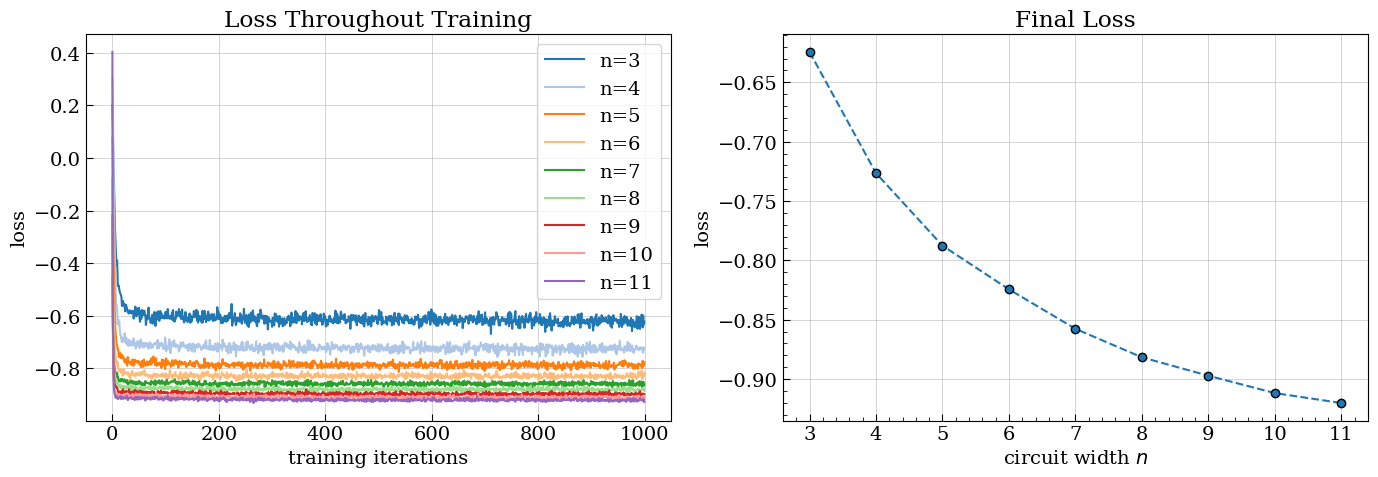

In [8]:
## use a different color scheme to plot a large number of curves
name = "tab20"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors_tab = cmap.colors  # type: list

fig, ax = plt.subplots(1, 2, figsize=(2 * 7, 5))
[ax[i].set_prop_cycle(color=colors_tab) for i in range(len(ax))]

final_loss_list = []
for num_qubits in num_qubit_list:
    loss_history = np.load("data/" + data_dirs[scaling][num_qubits] + "/loss_history.npy")
    ax[0].plot(np.asarray(loss_history), label=f"n={num_qubits}")
    final_loss_list.append(np.mean(loss_history[-10:]))

ax[0].set_xlabel("training iterations")
ax[0].set_ylabel("loss")
ax[0].set_title("Loss Throughout Training")
ax[0].legend()  # bbox_to_anchor=(-0.2, 1))

ax[1].plot(num_qubit_list, final_loss_list, "--o", markeredgecolor="k")
ax[1].set_xlabel(r"circuit width $n$")
ax[1].set_ylabel("loss")
ax[1].set_title("Final Loss")

plt.minorticks_on()
plt.tight_layout()
plt.savefig("figures/training_history.png")

plt.show()

Make a nice plot of the final loss

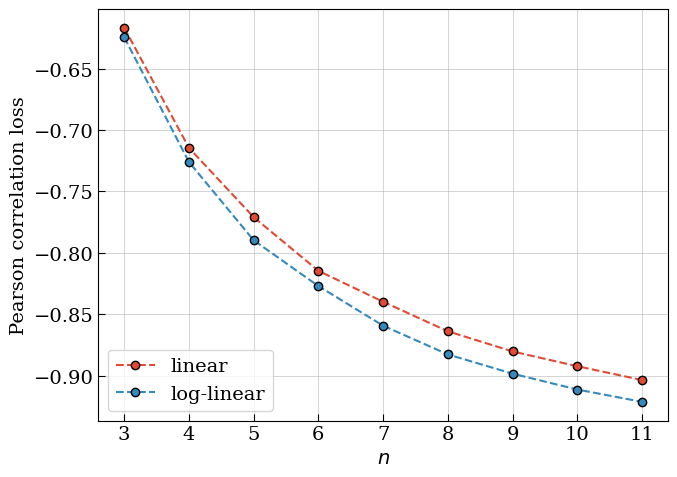

In [9]:
fig, ax = plt.subplots( figsize=(7, 5))

#axinset = inset_axes(ax, width=2.3*7/5, height=2.3)
#axinset.tick_params(axis='both', which='both', labelsize=10)

for scaling in ['linear', 'log-linear']:

    final_loss_list = []
    for num_qubits in num_qubit_list:
        loss_history = np.load("data/" + data_dirs[scaling][num_qubits] + "/loss_history.npy")
        final_loss_list.append(np.mean(loss_history[-20:]))
    final_loss_list = np.asarray(final_loss_list)

    ax.plot(num_qubit_list, final_loss_list, "--o", markeredgecolor="k", label=scaling)
    #axinset.plot(num_qubit_list, 1 + final_loss_list, "--o", markeredgecolor="k", label=scaling)

ax.set_xlabel(r"$n$")
ax.set_ylabel("Pearson correlation loss")
#ax.set_title("Final Loss")
ax.legend(loc='lower left')
ax.set_xticks(np.arange(3, len(num_qubit_list) + 3))

#axinset.set_xlabel(r"$n$", fontsize=12)
#axinset.set_ylabel("loss + 1", fontsize=12)
#axinset.set_xscale('log')
#axinset.set_yscale('log')
#aaxinsetx.legend()
#axinset.set_xticks(np.arange(3, len(num_qubit_list) + 3))

#plt.minorticks_on()
plt.tight_layout()
plt.savefig("figures/final_training_loss.png")

plt.show()

Do an exponential fit
- slope is very small, and the number of decades the data ranges over is quite small also, so this is probably not worthwhile.

In [10]:
from sklearn.linear_model import LinearRegression

X = np.asarray(num_qubit_list)[:, None]
y = 1 + final_loss_list
reg = LinearRegression().fit(X, y)
reg.coef_, reg.intercept_

(array([-0.03358015]), 0.40842658465107284)

Make a plot of the cumulative fraction of instances solved 

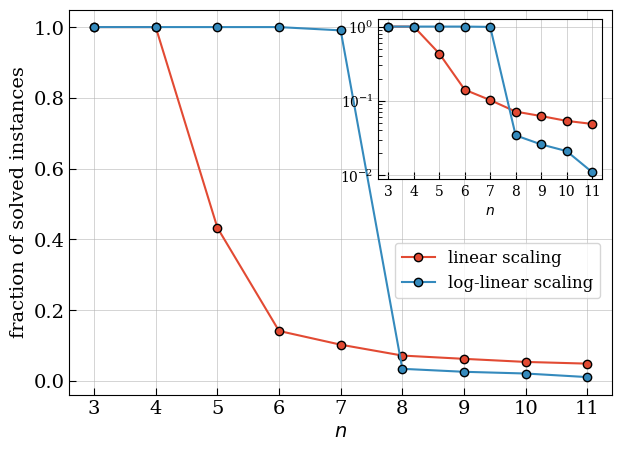

In [11]:
eval_max_iter = 1000
eval_num_trials = 20000

fig, ax = plt.subplots(figsize=(7, 5))
axinset = inset_axes(ax, width=1.6*7/5, height=1.6)
axinset.tick_params(axis='both', which='both', labelsize=10)

for scaling in ['linear', 'log-linear']:

    fraction_of_solved_instances = []
    for i, num_qubits in enumerate(num_qubit_list):
        with open(f"data/" + data_dirs[scaling][num_qubits] + f"/eval/steps_until_success_eval_max_iter_{eval_max_iter}_eval_num_trials_{eval_num_trials}_sampling_method_random_walk.pkl", "rb") as f:
            steps_until_success = pickle.load(f)

        fraction_of_solved_instances.append(
            len([x for x in steps_until_success["lgf"]["weighted_steps"] if x is not None])
            / len(steps_until_success["lgf"]["weighted_steps"])
        )

    ax.plot(num_qubit_list, fraction_of_solved_instances, "-o", markeredgecolor="k", label=f"{scaling} scaling")

    axinset.plot(num_qubit_list, fraction_of_solved_instances, "-o", markeredgecolor="k", label=f"{scaling} scaling")

ax.legend(loc=(0.6, 0.25), fontsize=12)
ax.set_xlabel(r"$n$")
ax.set_ylabel(r"fraction of solved instances")
ax.set_xticks(np.arange(3, len(num_qubit_list) + 3))

axinset.set_xlabel(r"$n$", fontsize=10)
#axinset.set_ylabel(r"fraction of solved instances")
axinset.set_yscale('log')
axinset.set_xticks(np.arange(3, len(num_qubit_list) + 3))

plt.savefig("figures/fraction_solved_instances.png")

plt.show()

Show the results for the LGF greedy algorithm.

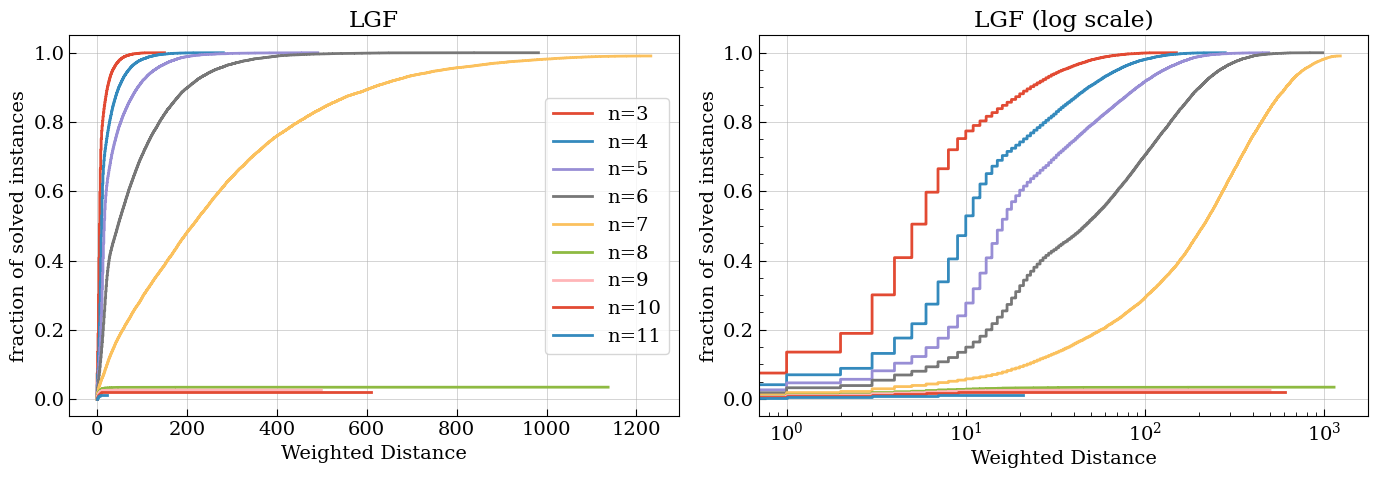

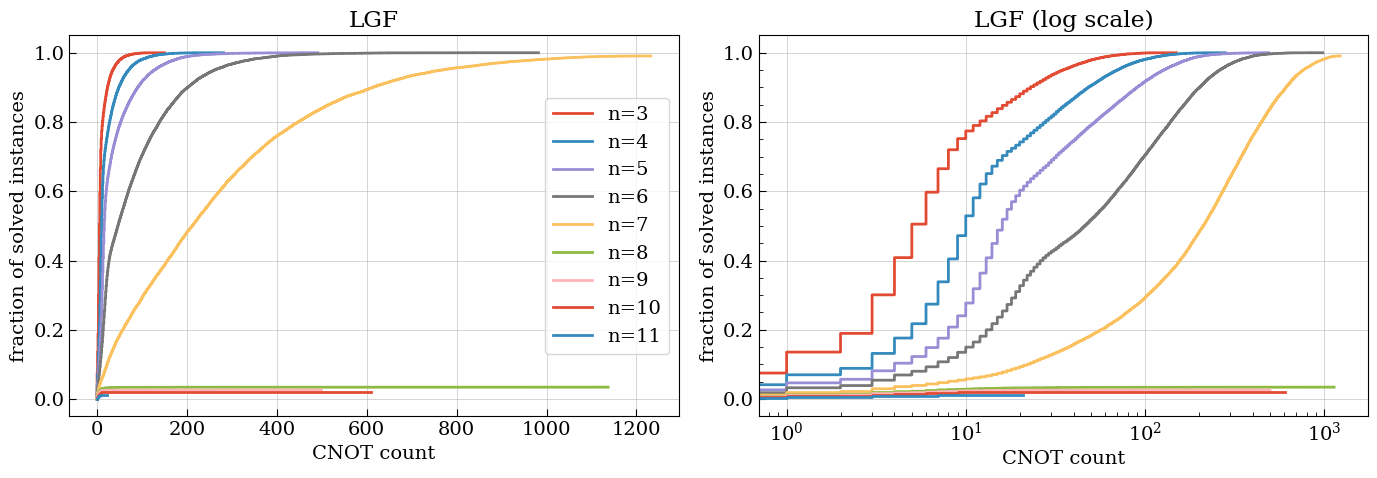

In [12]:
scaling = 'log-linear'

xlabel_dict = {"weighted_steps": "Weighted Distance", "CNOTs": "CNOT count"}
for metric, xlabel in xlabel_dict.items():
    fig, ax = plt.subplots(1, 2, figsize=(2 * 7, 5))
    # ax[0].set_prop_cycle(color=colors)
    # ax[1].set_prop_cycle(color=colors)

    for i, num_qubits in enumerate(num_qubit_list):
        with open(
            f"data/" + data_dirs[scaling][num_qubits] + f"/eval/steps_until_success_eval_max_iter_{eval_max_iter}_eval_num_trials_{eval_num_trials}_sampling_method_random_walk.pkl", "rb"
        ) as f:
            steps_until_success = pickle.load(f)

        cum_steps_utils_success_lgf = np.sort(
            [n for n in steps_until_success["lgf"][metric] if n is not None]
        )

        ax[0].step(
            cum_steps_utils_success_lgf,
            np.arange(len(cum_steps_utils_success_lgf))
            / len(steps_until_success["lgf"][metric]),
            label=f"n={num_qubits}",
            linewidth=2,
            alpha=1.0,
            linestyle="-",
            #color=colors[i],
        )
        ax[1].step(
            cum_steps_utils_success_lgf,
            np.arange(len(cum_steps_utils_success_lgf))
            / len(steps_until_success["lgf"][metric]),
            label=f"n={num_qubits}",
            linewidth=2,
            alpha=1.0,
            linestyle="-",
            #color=colors[i],
        )

    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel("fraction of solved instances")
    ax[0].legend()
    ax[0].set_title("LGF")

    ax[1].set_xscale("log")
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel("fraction of solved instances")
    ax[1].set_title("LGF (log scale)")

    plt.minorticks_on()
    plt.tight_layout()

    plt.show()

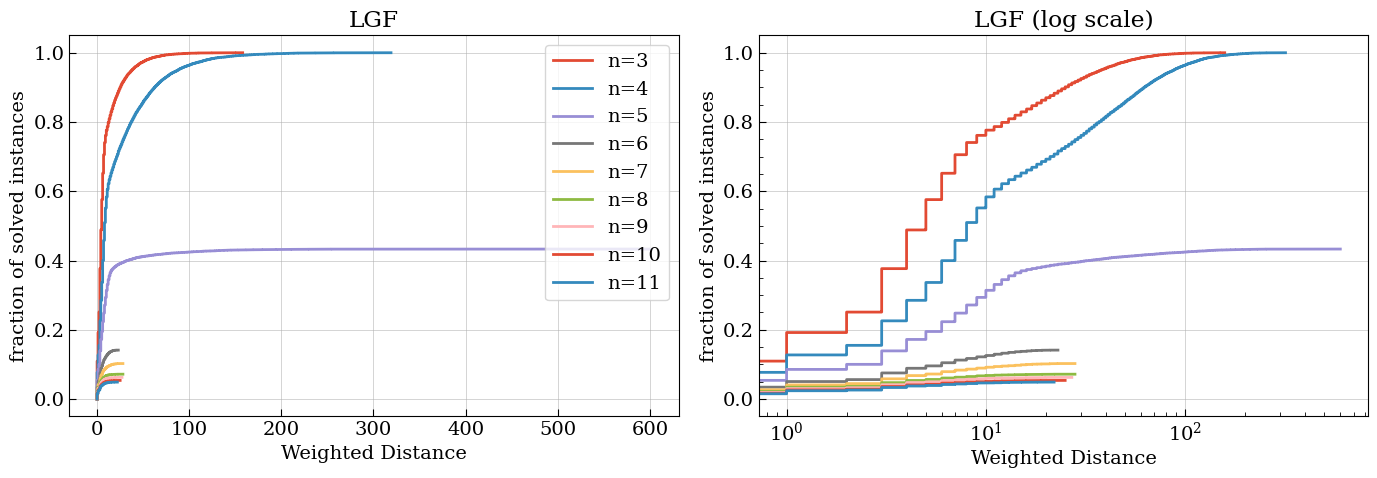

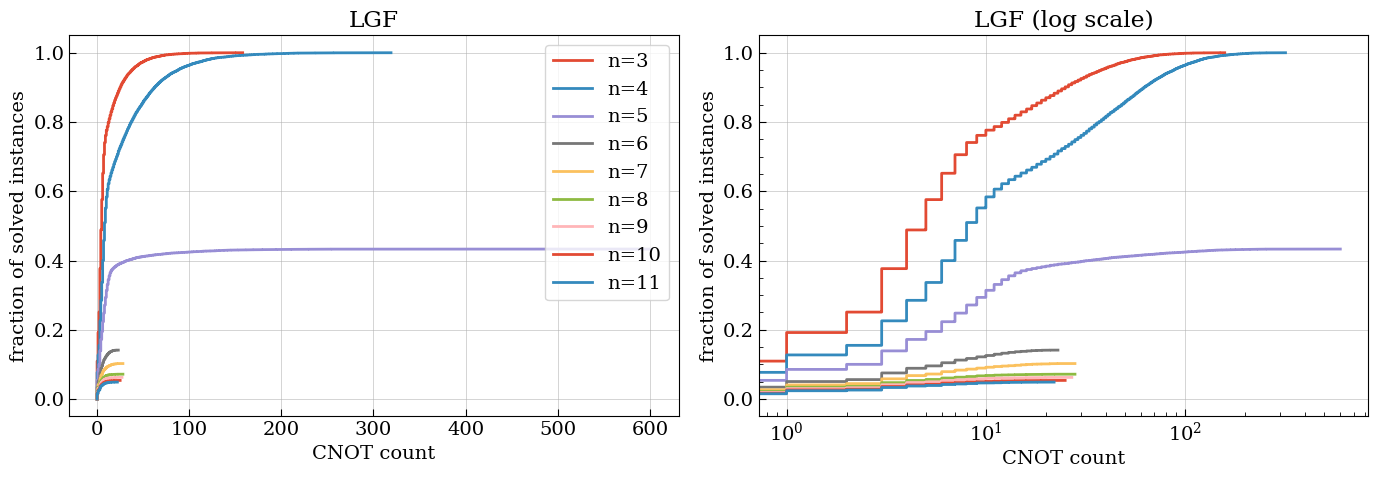

In [13]:
scaling = 'linear'

xlabel_dict = {"weighted_steps": "Weighted Distance", "CNOTs": "CNOT count"}
for metric, xlabel in xlabel_dict.items():
    fig, ax = plt.subplots(1, 2, figsize=(2 * 7, 5))
    # ax[0].set_prop_cycle(color=colors)
    # ax[1].set_prop_cycle(color=colors)

    for i, num_qubits in enumerate(num_qubit_list):
        with open(
            f"data/" + data_dirs[scaling][num_qubits] + f"/eval/steps_until_success_eval_max_iter_{eval_max_iter}_eval_num_trials_{eval_num_trials}_sampling_method_random_walk.pkl", "rb"
        ) as f:
            steps_until_success = pickle.load(f)

        cum_steps_utils_success_lgf = np.sort(
            [n for n in steps_until_success["lgf"][metric] if n is not None]
        )

        ax[0].step(
            cum_steps_utils_success_lgf,
            np.arange(len(cum_steps_utils_success_lgf))
            / len(steps_until_success["lgf"][metric]),
            label=f"n={num_qubits}",
            linewidth=2,
            alpha=1.0,
            linestyle="-",
            #color=colors[i],
        )
        ax[1].step(
            cum_steps_utils_success_lgf,
            np.arange(len(cum_steps_utils_success_lgf))
            / len(steps_until_success["lgf"][metric]),
            label=f"n={num_qubits}",
            linewidth=2,
            alpha=1.0,
            linestyle="-",
            #color=colors[i],
        )

    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel("fraction of solved instances")
    ax[0].legend()
    ax[0].set_title("LGF")

    ax[1].set_xscale("log")
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel("fraction of solved instances")
    ax[1].set_title("LGF (log scale)")

    plt.minorticks_on()
    plt.tight_layout()

    plt.show()

Now add in the comparison with the built-in Qiskit method.

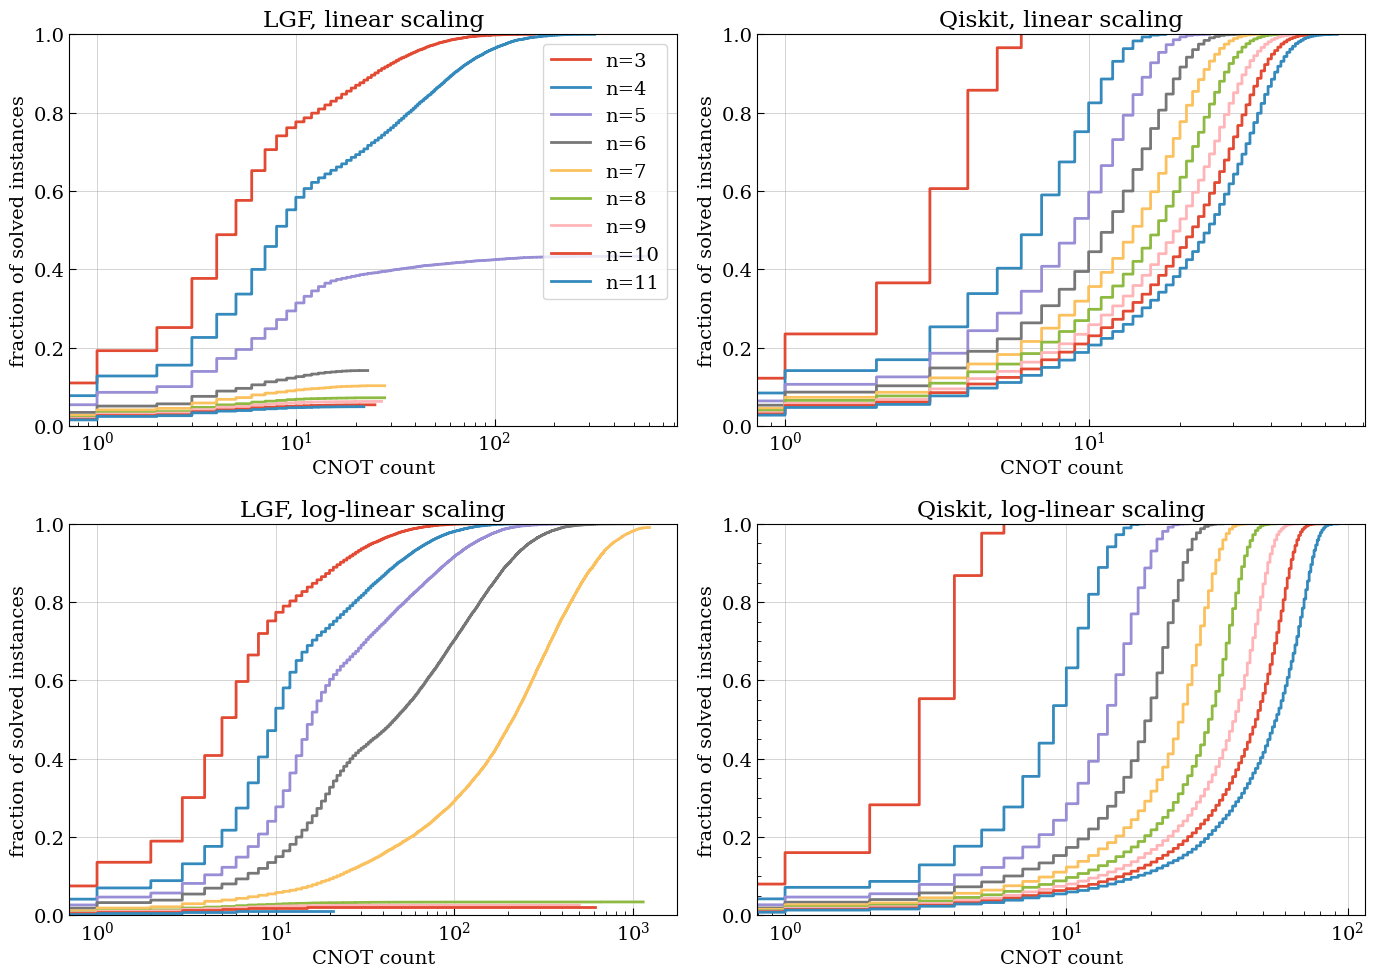

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(2 * 7, 2 * 5))
ax = ax.flatten()

for i_scaling, scaling in enumerate(['linear', 'log-linear']):

    metric = 'CNOTs'

    for i, num_qubits in enumerate(num_qubit_list):
        with open(
            f"data/" + data_dirs[scaling][num_qubits] + f"/eval/steps_until_success_eval_max_iter_{eval_max_iter}_eval_num_trials_{eval_num_trials}_sampling_method_random_walk.pkl", "rb"
        ) as f:
            steps_until_success = pickle.load(f)

        cum_steps_utils_success_lgf = np.sort(
            [n for n in steps_until_success["lgf"][metric] if n is not None]
        )
        cum_steps_utils_success_qiskit = np.sort(
            [n for n in steps_until_success["qiskit"][metric] if n is not None]
        )

        ax[2 * i_scaling].step(
            cum_steps_utils_success_lgf,
            np.arange(len(cum_steps_utils_success_lgf))
            / len(steps_until_success["lgf"][metric]),
            label=f"n={num_qubits}",
            linewidth=2,
            alpha=1.0,
            linestyle="-",
            #color=colors[i],
        )
        ax[2 * i_scaling + 1].step(
            cum_steps_utils_success_qiskit,
            np.arange(len(cum_steps_utils_success_qiskit))
            / len(steps_until_success["qiskit"][metric]),
            label=f"qiskit n={num_qubits}",
            linewidth=2,
            alpha=1.0,
            linestyle="-",
            #color=colors[i],
        )

    ax[2 * i_scaling].set_xscale("log")
    ax[2 * i_scaling].set_xlabel(xlabel)
    ax[2 * i_scaling].set_ylabel("fraction of solved instances")
    ax[2 * i_scaling].set_title(f"LGF, {scaling} scaling")
    #ax[2 * i_scaling].set_xlim([1, max(ax[0].get_xlim()[1], ax[1].get_xlim()[1])])
    ax[2 * i_scaling].set_ylim([0, 1])

    ax[2 * i_scaling + 1].set_xscale("log")
    ax[2 * i_scaling + 1].set_xlabel(xlabel)
    ax[2 * i_scaling + 1].set_ylabel("fraction of solved instances")
    ax[2 * i_scaling + 1].set_title(f"Qiskit, {scaling} scaling")
    #ax[2 * i_scaling].set_xlim([1, max(ax[0].get_xlim()[1], ax[1].get_xlim()[1])])
    ax[2 * i_scaling + 1].set_ylim([0, 1])

ax[0].legend()
plt.minorticks_on()
plt.tight_layout()
plt.savefig(f"figures/cumulative_plot.png")
plt.show()

In the above, the same random walk sampling method is used in both the training and evaluation runs. It is natural that the algorithm will perform best when both steps use the same sampling method, but we should also hope that the performance wouldn't degrade too drastically if the evaluation step used a different sampling method. To this end, make the same plot as above, but with a new set of data where the evaluation runs used uniformly-sampled Cliffords.

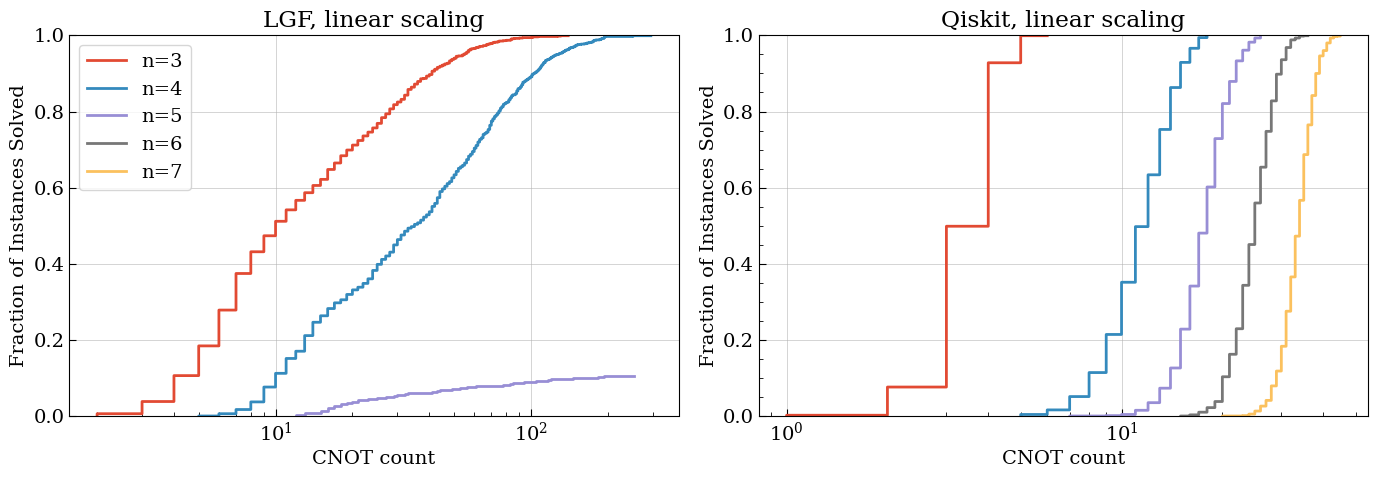

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(2 * 7, 5))
ax = ax.flatten()

for i_scaling, scaling in enumerate(['linear']):

    metric = 'CNOTs'

    for i, num_qubits in enumerate(range(3, 8)):
        with open(
            f"data/" + data_dirs[scaling][num_qubits] + f"/eval/steps_until_success_eval_max_iter_{eval_max_iter}_eval_num_trials_1000_sampling_method_uniform.pkl", "rb"
        ) as f:
            steps_until_success = pickle.load(f)

        cum_steps_utils_success_lgf = np.sort(
            [n for n in steps_until_success["lgf"][metric] if n is not None]
        )
        cum_steps_utils_success_qiskit = np.sort(
            [n for n in steps_until_success["qiskit"][metric] if n is not None]
        )

        ax[2 * i_scaling].step(
            cum_steps_utils_success_lgf,
            np.arange(len(cum_steps_utils_success_lgf))
            / len(steps_until_success["lgf"][metric]),
            label=f"n={num_qubits}",
            linewidth=2,
            alpha=1.0,
            linestyle="-",
            #color=colors[i],
        )
        ax[2 * i_scaling + 1].step(
            cum_steps_utils_success_qiskit,
            np.arange(len(cum_steps_utils_success_qiskit))
            / len(steps_until_success["qiskit"][metric]),
            label=f"qiskit n={num_qubits}",
            linewidth=2,
            alpha=1.0,
            linestyle="-",
            #color=colors[i],
        )

    ax[2 * i_scaling].set_xscale("log")
    ax[2 * i_scaling].set_xlabel(xlabel)
    ax[2 * i_scaling].set_ylabel("Fraction of Instances Solved")
    ax[2 * i_scaling].set_title(f"LGF, {scaling} scaling")
    #ax[2 * i_scaling].set_xlim([1, max(ax[0].get_xlim()[1], ax[1].get_xlim()[1])])
    ax[2 * i_scaling].set_ylim([0, 1])

    ax[2 * i_scaling + 1].set_xscale("log")
    ax[2 * i_scaling + 1].set_xlabel(xlabel)
    ax[2 * i_scaling + 1].set_ylabel("Fraction of Instances Solved")
    ax[2 * i_scaling + 1].set_title(f"Qiskit, {scaling} scaling")
    #ax[2 * i_scaling].set_xlim([1, max(ax[0].get_xlim()[1], ax[1].get_xlim()[1])])
    ax[2 * i_scaling + 1].set_ylim([0, 1])

ax[0].legend()
plt.minorticks_on()
plt.tight_layout()
#plt.savefig(f"figures/cumulative_plot.png")
plt.show()

In [16]:
cum_steps_utils_success_lgf

array([44])

In [17]:
style_dict = {'linear':'-', 'log-linear':'--'}

for metric, xlabel in xlabel_dict.items():
    
    print(f'Plotting {xlabel}')

    fig, ax = plt.subplots(2, 5, figsize=(5 * 7, 2 * 5), dpi=600)
    ax = ax.flatten()

    # loop over all scalings
    for i_scaling, scaling in enumerate(['linear', 'log-linear']):

        ## loop over all circuit widths
        for i, num_qubits in enumerate(num_qubit_list):
                
            with open(
                f"data/" + data_dirs[scaling][num_qubits] + f"/eval/steps_until_success_eval_max_iter_{eval_max_iter}_eval_num_trials_{eval_num_trials}_sampling_method_random_walk.pkl", "rb"
            ) as f:
                steps_until_success = pickle.load(f)

            cum_steps_utils_success_lgf = np.sort(
                [n for n in steps_until_success["lgf"][metric] if n is not None]
            )
            # cum_steps_utils_success_random = np.sort([n for n in steps_until_success['random'] if n is not None])
            cum_steps_utils_success_qiskit = np.sort(
                [n for n in steps_until_success["qiskit"][metric] if n is not None]
            )

            ax[i].step(
                cum_steps_utils_success_qiskit,
                np.arange(len(cum_steps_utils_success_qiskit))
                / len(steps_until_success["qiskit"][metric]),
                label=f"Qiskit ({scaling})",
                linewidth=2,
                alpha=1.0,
                linestyle=style_dict[scaling],
                color=colors[0],
            )
            ax[i].step(
                cum_steps_utils_success_lgf,
                np.arange(len(cum_steps_utils_success_lgf))
                / len(steps_until_success["lgf"][metric]),
                label=f"LGF ({scaling})",
                linewidth=2,
                alpha=1.0,
                linestyle=style_dict[scaling],
                color=colors[1],
            )

            ax[i].set_title(f"n = {num_qubits}", fontsize=18)
            ax[i].set_xscale("log")
            #ax[i].legend()
            # ax.set_xlim([1, max(ax[0].get_xlim()[1], ax[1].get_xlim()[1])])
            ax[i].set_ylim([0, 1])

            if i >= 5:
                ax[i].set_xlabel(xlabel, fontsize=18)
            if i in [0, 5]:
                ax[i].set_ylabel("Fraction of Instances Solved")

    handles,labels = ax[0].get_legend_handles_labels()
    handles = [handles[0], handles[2], handles[1], handles[3]]
    labels = [labels[0], labels[2], labels[1], labels[3]]
    ax[0].legend(handles,labels)

    plt.minorticks_on()
    plt.tight_layout()
    plt.savefig(f"figures/cumulative_plot_comparison_{metric}.png")
    plt.show()

Plotting Weighted Distance


Plotting CNOT count


Extract the conditional statistics (conditional here means that the LGF algorithm terminated successfully).

In [18]:
steps_until_success_conditional = {
    "qiskit" : {scaling: {metric: {n:[] for n in num_qubit_list} for metric in ["CNOTs", "weighted_steps"]} for scaling in ['linear', 'log-linear']},
    "lgf" : {scaling: {metric: {n:[] for n in num_qubit_list} for metric in ["CNOTs", "weighted_steps"]} for scaling in ['linear', 'log-linear']},
    }

# loop over scaling
for scaling in ['linear', 'log-linear']:
    
    # loop over metric
    for metric in ["CNOTs", "weighted_steps"]:

        # loop over num_qubits
        for num_qubits in num_qubit_list:
     
            # load
            with open(f"data/" + data_dirs[scaling][num_qubits] + f"/eval/steps_until_success_eval_max_iter_{eval_max_iter}_eval_num_trials_{eval_num_trials}_sampling_method_random_walk.pkl", "rb") as f:
                steps_until_success = pickle.load(f)
            
            # loop over all iterations in an evaluation run
            for steps_qiskit, steps_lgf in zip(steps_until_success["qiskit"][metric], steps_until_success["lgf"][metric]):
            
                # condition on instances where the LGF approach terminates    
                if steps_lgf is not None:
                    steps_until_success_conditional["qiskit"][scaling][metric][num_qubits].append(steps_qiskit)
                    steps_until_success_conditional["lgf"][scaling][metric][num_qubits].append(steps_lgf)
                    
            # convert to numpy array
            steps_until_success_conditional["qiskit"][scaling][metric][num_qubits] = np.asarray(steps_until_success_conditional["qiskit"][scaling][metric][num_qubits])
            steps_until_success_conditional["lgf"][scaling][metric][num_qubits] = np.asarray(steps_until_success_conditional["lgf"][scaling][metric][num_qubits])

Print out some statistics

In [19]:
for scaling in ['linear', 'log-linear']:

    print(f"\nscaling={scaling}")

    for num_qubits in num_qubit_list:

        sample_size = len(steps_until_success_conditional["lgf"][scaling]["CNOTs"][num_qubits]) 
        sample_size_nontrivial = np.sum(steps_until_success_conditional["qiskit"][scaling][metric][num_qubits] != 0)

        median_num_CNOTs_qiskit = np.median(steps_until_success_conditional["qiskit"][scaling][metric][num_qubits])
        max_num_CNOTs_qiskit = np.max(steps_until_success_conditional["qiskit"][scaling][metric][num_qubits])

        delta = steps_until_success_conditional["qiskit"][scaling][metric][num_qubits] - steps_until_success_conditional["lgf"][scaling][metric][num_qubits]
        indices_nontrivial_improvement = (delta > 0)
        fractional_improvement = delta[indices_nontrivial_improvement] / (steps_until_success_conditional["qiskit"][scaling][metric][num_qubits][indices_nontrivial_improvement])

        if np.sum(indices_nontrivial_improvement) > 0:
            median_num_CNOTs_qiskit_delta_gt_0 = np.median(steps_until_success_conditional["qiskit"][scaling][metric][num_qubits][indices_nontrivial_improvement])
            max_num_CNOTs_qiskit_delta_gt_0 = np.max(steps_until_success_conditional["qiskit"][scaling][metric][num_qubits][indices_nontrivial_improvement])
        else:
            median_num_CNOTs_qiskit_delta_gt_0 = 'N/A'
            max_num_CNOTs_qiskit_delta_gt_0 = 'N/A'

        out_string = (
            f"  n={num_qubits}" + 
            f"\n    number of instances where lgf terminated successfully: {sample_size}" + 
            f"\n    percent of instances where lgf terminated successfully: {100*sample_size/eval_num_trials:.1f}%" + 
            f"\n    number of instances where lgf terminated successfully and CNOT count > 0: {sample_size_nontrivial}" + 
            f"\n    median number of CNOTs in Qiskit decomp: {median_num_CNOTs_qiskit}" + 
            f"\n    max number of CNOTs in Qiskit decomp: {max_num_CNOTs_qiskit}" + 
            f"\n    median number of CNOTs in Qiskit decomp when delta > 0: {median_num_CNOTs_qiskit_delta_gt_0}" + 
            f"\n    max number of CNOTs in Qiskit decomp when delta > 0: {max_num_CNOTs_qiskit_delta_gt_0}" + 
            f"\n    LGF beats Qiskit {100*np.mean(delta > 0):.1f}% of the time" +
            f"\n    LGF beats or matches Qiskit {100*np.mean(delta >= 0):.1f}% of the time" +
            f"\n    fractional CNOT improvement: {100*np.mean(fractional_improvement):.1f}%"
        )
        print(out_string)


scaling=linear
  n=3
    number of instances where lgf terminated successfully: 20000
    percent of instances where lgf terminated successfully: 100.0%
    number of instances where lgf terminated successfully and CNOT count > 0: 17565
    median number of CNOTs in Qiskit decomp: 3.0
    max number of CNOTs in Qiskit decomp: 6
    median number of CNOTs in Qiskit decomp when delta > 0: N/A
    max number of CNOTs in Qiskit decomp when delta > 0: N/A
    LGF beats Qiskit 0.0% of the time
    LGF beats or matches Qiskit 47.5% of the time
    fractional CNOT improvement: nan%
  n=4
    number of instances where lgf terminated successfully: 20000
    percent of instances where lgf terminated successfully: 100.0%
    number of instances where lgf terminated successfully and CNOT count > 0: 18320
    median number of CNOTs in Qiskit decomp: 7.0
    max number of CNOTs in Qiskit decomp: 18
    median number of CNOTs in Qiskit decomp when delta > 0: 9.0
    max number of CNOTs in Qiskit deco

/home/gavin/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gavin/.local/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


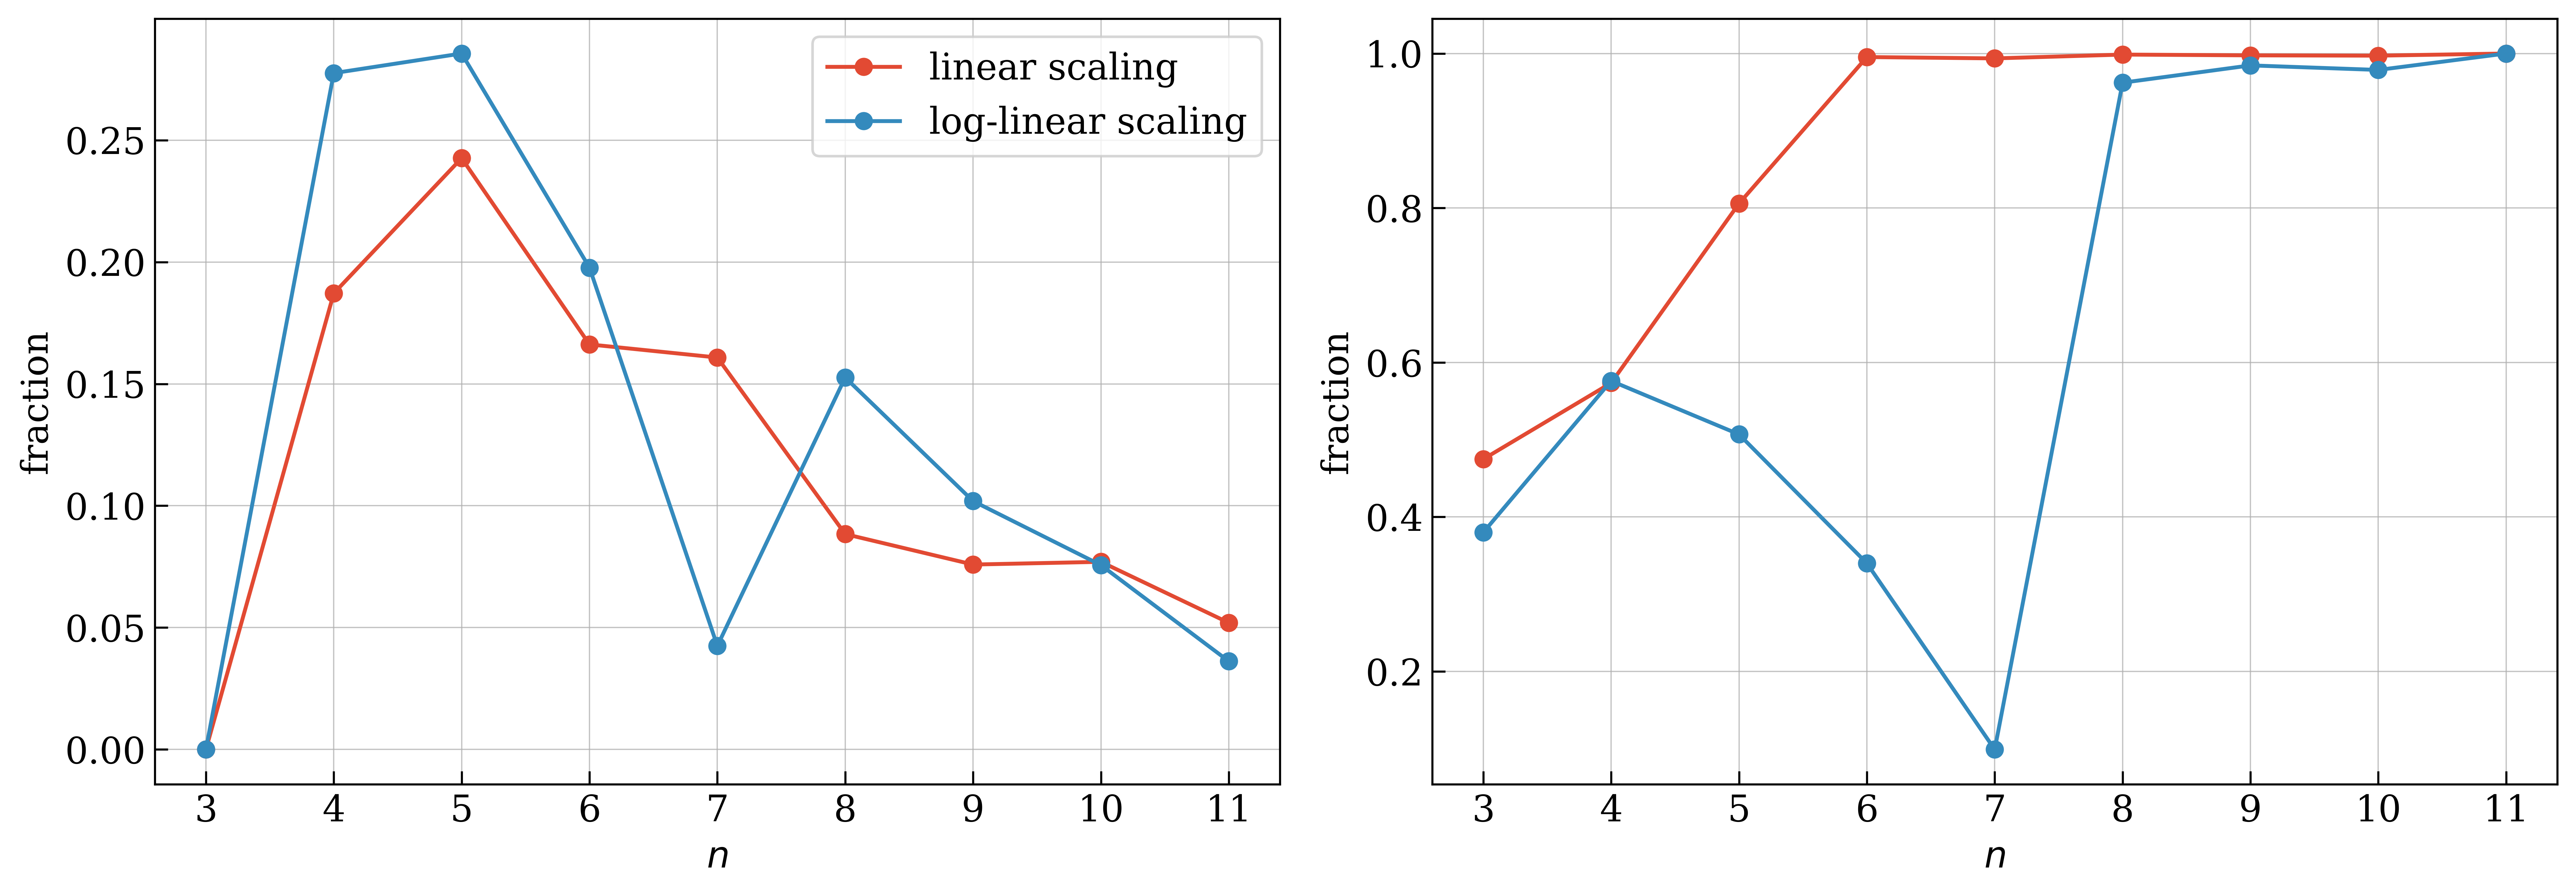

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(2 * 7, 5), dpi=600)
ax = ax.flatten()

for scaling in ['linear', 'log-linear']:
    for metric in ["CNOTs"]: #, "weighted_steps"]:
        
        beats = [
            np.mean(
                steps_until_success_conditional["qiskit"][scaling][metric][num_qubits] - steps_until_success_conditional["lgf"][scaling][metric][num_qubits] > 0) 
            for num_qubits in num_qubit_list]
        
        ax[0].plot(num_qubit_list, beats, '-o', label=f"{scaling} scaling") #, metric={metric}")

        beats_or_matches = [
            np.mean(
                steps_until_success_conditional["qiskit"][scaling][metric][num_qubits] - steps_until_success_conditional["lgf"][scaling][metric][num_qubits] >= 0) 
            for num_qubits in num_qubit_list]
        
        ax[1].plot(num_qubit_list, beats_or_matches, '-o')     

ax[0].set_xlabel(r"$n$", fontsize=14)
ax[0].set_ylabel(r"fraction", fontsize=14)
ax[0].set_xticks(np.arange(3, len(num_qubit_list) + 3))

ax[1].set_xlabel(r"$n$", fontsize=14)
ax[1].set_ylabel(r"fraction", fontsize=14)
ax[1].set_xticks(np.arange(3, len(num_qubit_list) + 3))

#ax.set_title("Fraction of instances where LGF beats Qiskit, conditioned on LGF terminating")
ax[0].legend()
plt.tight_layout()

plt.savefig(f"figures/conditional_comparison_against_qiskit.png")
plt.show()

Analyze the effect of the random seeds on the success/probability of the hillclimbing algorithm.

In [23]:
num_qubits = 4
data_dir = f"data/data_n_{num_qubits}/"

lgf_model = cl.LGFModel(
    num_qubits=num_qubits,
    device=device,
    rng=rng,
    drop_phase_bit=True,
    hidden_layers=[32, 16, 4],
)

checkpoint = torch.load(data_dir + "checkpoint")
lgf_model.load_state_dict(checkpoint)

AttributeError: module 'clifford' has no attribute 'LGFModel'

In [ ]:
with open(data_dir + "args.pkl", "rb") as f:
    x = pickle.load(f)
x

In [ ]:
max_iter = 1000
num_initial_state_trials = 100
num_hillclimb_trials = 100
success_matrix = np.zeros((num_initial_state_trials, num_hillclimb_trials))

## loop over initial states
for initial_seed in range(num_initial_state_trials):
    problem = cl.Problem(lgf_model.num_qubits, seed=initial_seed)
    success_count = 0.0

    ## loop over hillclimbing seeds
    pbar = tqdm.trange(num_hillclimb_trials)
    for hillclimbing_seed in pbar:
        result = cl.hillclimbing(
            problem.state,
            lgf_model,
            max_iter=max_iter,
            seed=hillclimbing_seed,
        )

        success_matrix[initial_seed, hillclimbing_seed] = result["success"] * 1.0
        success_count += result["success"] * 1.0
        pbar.set_description(
            "success rate=%.4f" % (success_count / (hillclimbing_seed + 1))
        )

In [ ]:
## average over initial state seeds
## each entry is a different hillclimbing seed
np.mean(success_matrix, axis=0)

In [ ]:
## average over hillclimbing seeds
## each entry is a different initial seed
np.mean(success_matrix, axis=1)

In [ ]:
def relative_weight_x_to_cx(fidelity_x, fidelity_cx):
    """
    How many x gates are equivalent to a single cx gate,
    in terms of fidelity reduction?
    """
    return np.log(fidelity_cx) / np.log(fidelity_x)


relative_weight_x_to_cx(1 - 2.556e-4, 1 - 9.263e-3)

In [ ]:
weight_dict = {"x": 1, "y": 1, "z": 1, "h": 1, "s": 1, "sdg": 1, "cx": 30, "swap": 90}
# cl.normalize_dict(weight_dict)
weight_dict